In [2]:
X, y = make_data(n_features=2, n_pts=300, noise=0.1)

/home/pkgalea/Galvanize/knn/src/knn.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))


[0.7444969]


/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


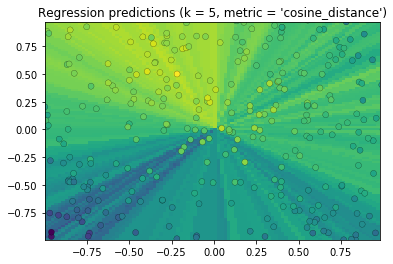

In [3]:
from knn import KNNRegressor
from knn import cosine_distance, euclidean_distance, manhattan_distance
from make_data import make_data
import matplotlib.pyplot as plt
from knn_visualization import plot_predictions
%matplotlib inline  


#y = y.reshape(30)
model = KNNRegressor(k=5, distance=cosine_distance)
model.fit(X, y)
#predictions = model.predict(X)
print(model.predict([[0,0]]))
fig, ax = plt.subplots()
plot_predictions(ax, model, X, y)
fig.show()

[0.85827867]


/home/pkgalea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


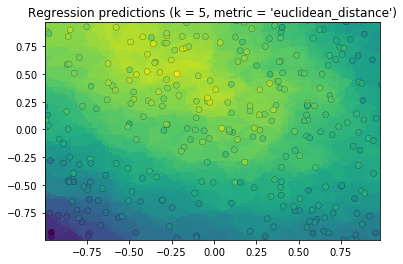

In [4]:

#y = y.reshape(30)
model = KNNRegressor(k=5, distance=euclidean_distance)
model.fit(X, y)
#predictions = model.predict(X)
print(model.predict([[0,0]]))
fig, ax = plt.subplots()
plot_predictions(ax, model, X, y)
fig.show()

In [4]:
import pandas as pd 
import seaborn as sns
pokemon = pd.read_csv("../Pokemon.csv")

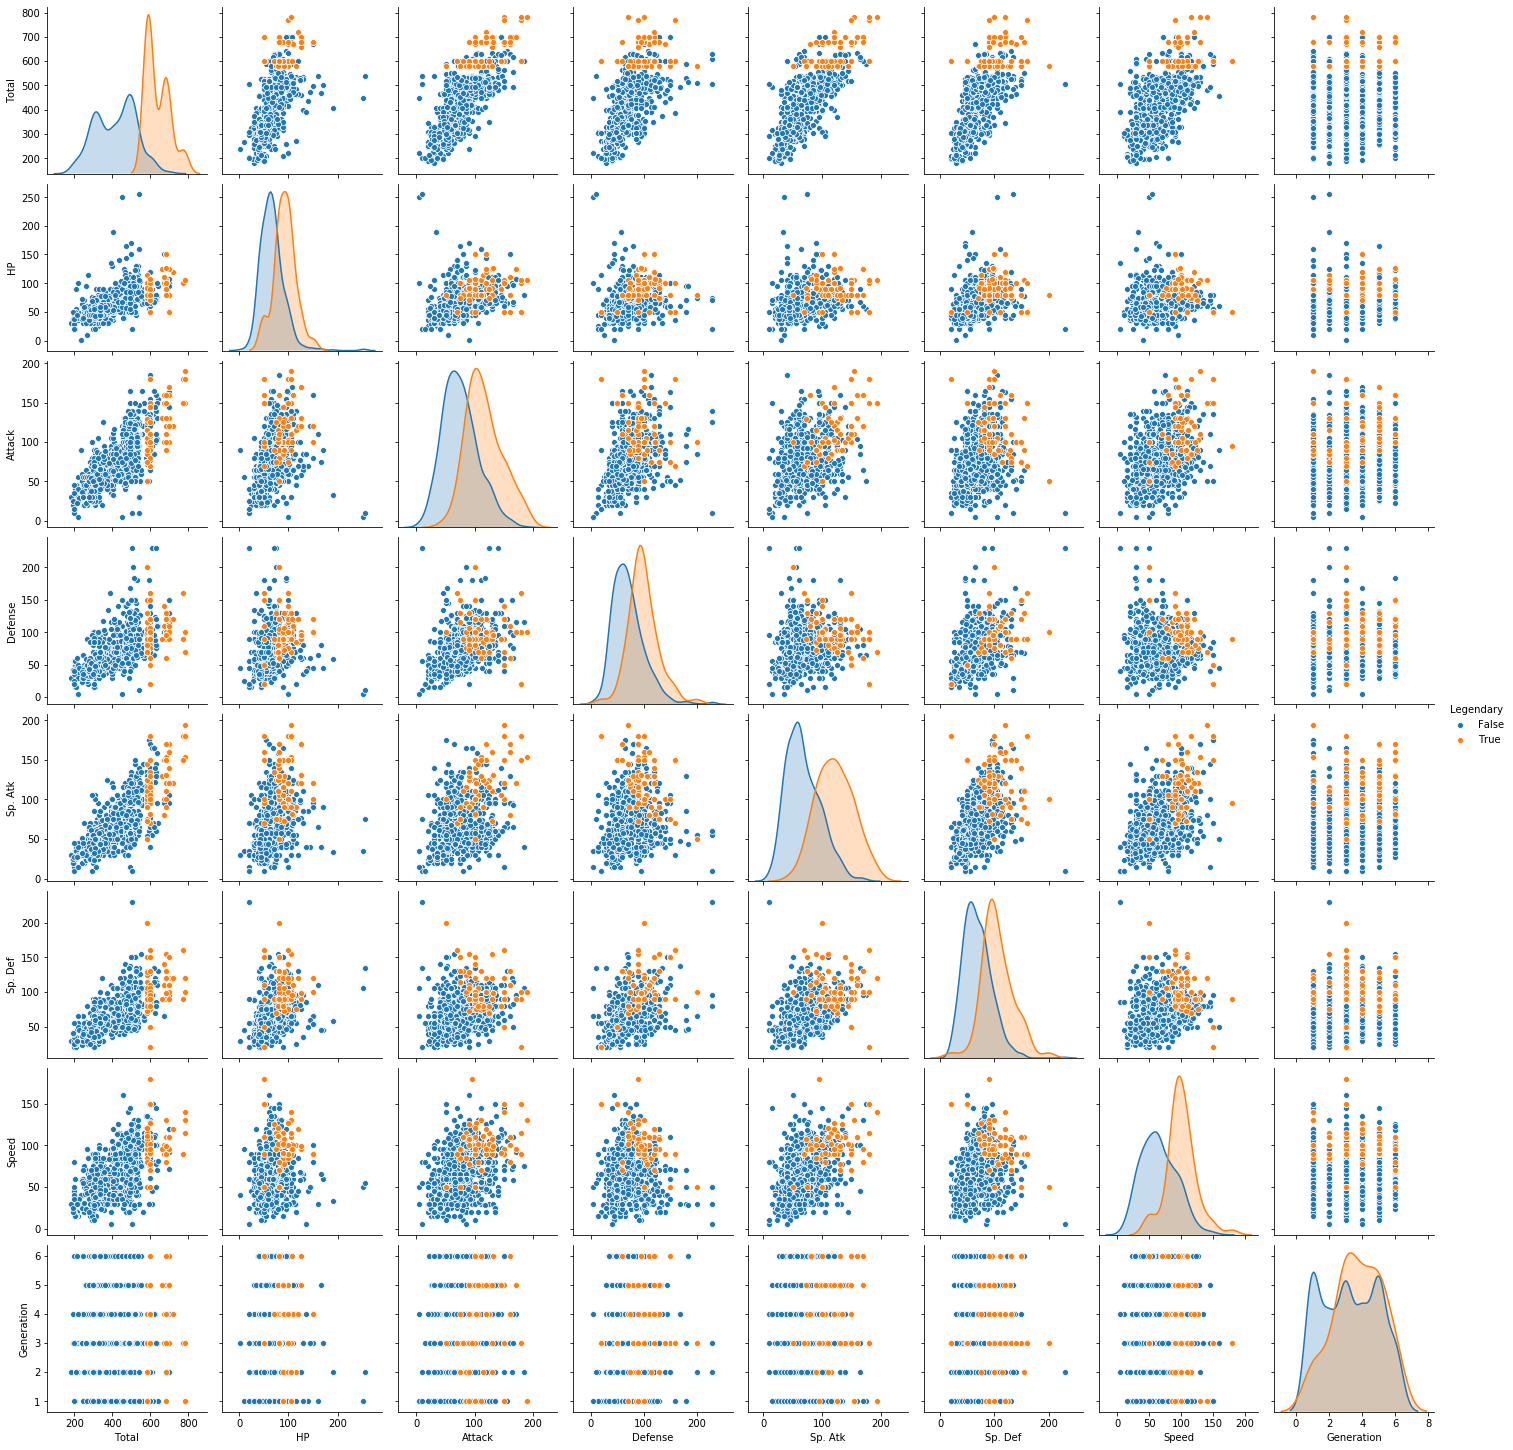

In [32]:
sns.pairplot(pokemon.iloc[:, 2:], hue="Legendary")

In [43]:
legends = pokemon[pokemon.Legendary]
normals = pokemon[pokemon.Legendary == False].sample(100)

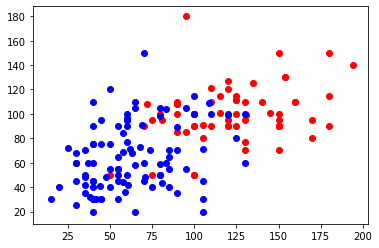

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(legends["Sp. Atk"], legends.Speed, color="red")

ax.scatter(normals["Sp. Atk"], normals.Speed, color="blue")


In [34]:
pokemon.groupby("Legendary").count()

#  Name  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
Legendary                                                                    
False      735   735     735     374    735  735     735      735      735   
True        65    65      65      40     65   65      65       65       65   

           Sp. Def  Speed  Generation  
Legendary                              
False          735    735         735  
True            65     65          65

In [28]:
pokemon["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [46]:
def plot_predictions(ax, reg, X, y):
    """Plot the decision boundary of a kNN regressor.

    Plots predictions as colors.

    Assumes regressor, reg, has a .predict() method that follows the
    sci-kit learn functionality.

    X must contain only 2 continuous features.

    Function modeled on scikit-learn example.

    Colors have been chosen for accessibility.


    Parameters
    ----------
    reg: instance of regressor object
        A fitted regressor with a .predict() method.
    X: numpy array, shape = [n_observations, n_features]
        Training data to display.
    y: numpy array, shape = [n_observations,]
        Target labels.
    """
    mesh_count = 100.

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    feature_1 = X[:, 0]
    feature_2 = X[:, 1]
    x_min, x_max = feature_1.min(), feature_1.max()
    y_min, y_max = feature_2.min(), feature_2.max()
    v_min, v_max = y.min(), y.max()

    x_mesh_step_size = (x_max - x_min)/mesh_count
    y_mesh_step_size = (y_max - y_min)/mesh_count

    xx, yy = np.meshgrid(np.arange(x_min, x_max, x_mesh_step_size),
                         np.arange(y_min, y_max, y_mesh_step_size))
    values = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    values = values.reshape(xx.shape)
    ax.pcolormesh(xx, yy,
                  values,
                  cmap='viridis',
                  vmin=v_min,
                  vmax=v_max)

    # Plot the training points, saving the colormap
    sctr = ax.scatter(feature_1, feature_2,
                      c=y,
                      cmap='viridis',
                      edgecolor='black', lw=0.2)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_title("Regression predictions (k = {0}, metric = '{1}')"
                 .format(reg.k, reg.distance.__name__))

In [13]:
import pandas as pd
#df = pd.read_csv("../data/svmguide4.t", sep=' ', names = ["target", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10"])
df = pd.read_csv("../data/seeds_dataset.csv", names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", "groove_length", "target"])
df


area  perimeter  compactness  kernel_length  kernel_width  asymmetry  \
0    15.26      14.84       0.8710          5.763         3.312      2.221   
1    14.88      14.57       0.8811          5.554         3.333      1.018   
2    14.29      14.09       0.9050          5.291         3.337      2.699   
3    13.84      13.94       0.8955          5.324         3.379      2.259   
4    16.14      14.99       0.9034          5.658         3.562      1.355   
..     ...        ...          ...            ...           ...        ...   
205  12.19      13.20       0.8783          5.137         2.981      3.631   
206  11.23      12.88       0.8511          5.140         2.795      4.325   
207  13.20      13.66       0.8883          5.236         3.232      8.315   
208  11.84      13.21       0.8521          5.175         2.836      3.598   
209  12.30      13.34       0.8684          5.243         2.974      5.637   

     groove_length  target  
0            5.220       1  
1            4.956       1  
2            4.825       1  
3            4.805       1  
4            5.175       1  
..             ...     ...  
205          4.870       3  
206          5.003       3  
207          5.056       3  
208          5.044       3  
209          5.063       3  

[210 rows x 8 columns]

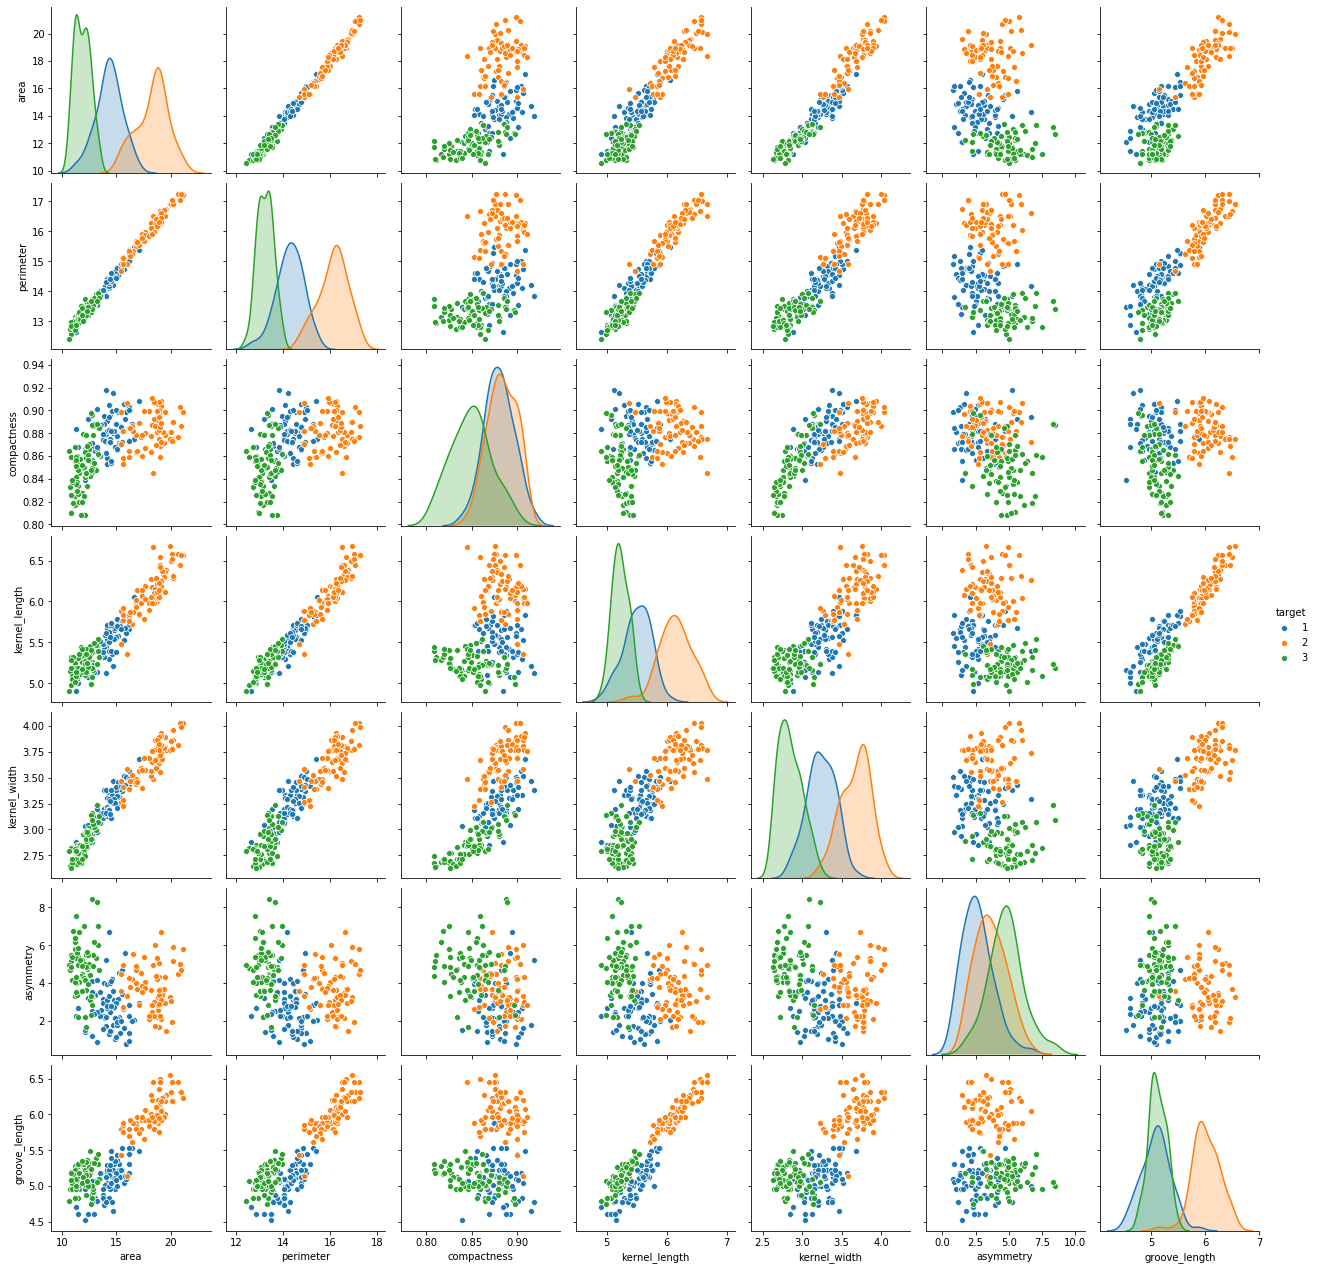

In [14]:
import seaborn as sns
sns.pairplot(df, hue="target")

In [15]:
df.shape

(210, 8)

In [18]:

from selenium import webdriver

In [23]:
driver = webdriver.Chrome()

#driver.find_element_by_id("input_1").send_keys(self.username)
#driver.find_element_by_id ("input_2").send_keys(self.password)
#driver.find_element_by_css_selector(".credentials_input_submit").click()


In [30]:
driver.get ("https://www.nytimes.com/crosswords/game/daily/2019/09/02")

'<html lang="en"><head>\n    \n<script src="https://cdn.ampproject.org/rtv/012003171848440/amp4ads-host-v0.js"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2020032401.js"></script><script type="text/javascript" async="" id="iterate-script" src="https://platform.iteratehq.com/sdk-prod-a3300c05ecb2975d1679.js"></script><script type="text/javascript" async="" src="https://sb.scorecardresearch.com/c2/3005403/cs.js"></script><script type="text/javascript" async="" src="https://gum.criteo.com/sync?r=2&amp;c=321&amp;j=window.advBidxc.mnetRtusId"></script><script type="text/javascript" async="" src="https://gum.criteo.com/sync?r=2&amp;c=321&amp;j=window.advBidxc.mnetRtusId"></script><script id="iterate-js" async="" src="https://platform.iteratehq.com/loader.js"></script><script async="" src="https://static.chartbeat.com/js/chartbeat.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script
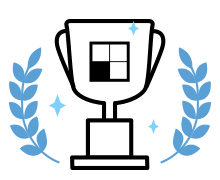

In [32]:
driver.page_source